# Data collection

In [1]:
# As the requirement about Gutengerg Dataset, I have found out the link where I could get this data. I downloaded
# it. In the data I got, there are about 143 authors but I only selected 12 of them as my data. For each author,
# I chose about 6 to 10 .txt files and I was trying to make sure that all the text for each of them are above 1000
# texts as the requiement.
# About where I can get the data, you can see the link here 
# - "https://web.eecs.umich.edu/~lahiri/gutenberg_dataset.html" and see for more information.

# 1. Pre-process data using Spacy and other methods.

In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /home/dungpm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
movie_data = load_files(r"/home/dungpm/dungpm/NLP_author_classification/data_final")
X, y = movie_data.data, movie_data.target

In [3]:
# Take a look at length of traning data and target
print("Length of traning data - text files: ", len(X))
print("Length of targets - authors: ", len(y))

Length of traning data - text files:  84
Length of targets - authors:  84


In [4]:
# For target lables
print("Target's lables: ", y)

Target's lables:  [ 3  4  5  6  3  6  0  7  3  0  9  1  8 10  2  3 10  9  6 10 10  8  4  8
  7  5  9  0  0  9  7  0  4  6  7  0  1  2  4  0 10  5  0  4  3  1  8  3
  1  3  6 10  0  4  9  1  7  2  3  6  6  3  4  2 10 10  2 10  3  4  5  4
  8  7  1  9  4  2  0 10  8  8  6  5]


In [5]:
# I use "load_file" function from sklearn to load all the data. This function will help me to automativally 
# devide the data into training data and target.

In [6]:
# After I chose some .txt file for each author, I have done some simple filter on these file. I delete all the name
# of each author in their file to make sure that these name will NOT effect as strong feature during traing data.
# And I hope this - pre-processing data step will make a good result.

In [7]:
# Now let do some more other pre-processing step with this data using Spacy and other methods. Text may 
# contain numbers, special characters, and unwanted spaces. I am going to remove them out of the data.

In [8]:
print(X[0])

b'\r\nTHE COLLECTED\r\nWORKS OF\r\nAMBROSE BIERCE\r\n\r\nVOLUME II\r\n\r\n\r\nIN THE MIDST OF LIFE\r\n\r\nTALES OF SOLDIERS AND CIVILIANS\r\n\r\n\r\n\r\nOriginally Published 1909\r\n\r\n\r\nPREFACE\r\nTO THE FIRST EDITION\r\n\r\n\r\nDenied existence by the chief publishing houses of the country, this\r\nbook owes itself to Mr. E.L.G. Steele, merchant, of this city. In\r\nattesting Mr. Steele\'s faith in his judgment and his friend, it will\r\nserve its author\'s main and best ambition.\r\n\r\nA.B.\r\n\r\nSAN FRANCISCO, Sept. 4, 1891.\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n\r\nA HORSEMAN IN THE SKY                                                 15\r\nAN OCCURRENCE AT OWL CREEK BRIDGE                                     27\r\nCHICKAMAUGA                                                           46\r\nA SON OF THE GODS                                                     58\r\nONE OF THE MISSING                                                    71\r\nKILLED AT RESACA                         

In [9]:
# find out average number of words in each text file
length_of_data = []
for i in range(len(X)):
    length_of_data.append(len(X[i]))
ave_num = round(sum(length_of_data)/len(length_of_data))
print("Average number of words in each text file: ", ave_num, "words")

Average number of words in each text file:  447583 words


In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove "\n"
    document = re.sub(r'\n\s+', ' ', document)
    # remove "\n"
    document = re.sub(r'\r\s+', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # remove all single "n" characters
    document = re.sub(r'n\s+', ' ', document)
    # remove all single "r" characters
    document = re.sub(r'r\s+', ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

[nltk_data] Downloading package wordnet to /home/dungpm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
print(documents[0])

nthe collected nworks of nambrose bierce nvolume ii ni the midst of life ntales of soldier and civilian noriginally published 1909 npreface nto the first editio ndenied existence by the chief publishing house of the country this nbook owes itself to m l steele merchant of this city i nattesting m steele faith i his judgment and his friend it will nserve it autho mai and best ambitio na nsa francisco sept 4 1891 ncontents na horsema i the sky 15 na occurrence at owl creek bridge 27 nchickamauga 46 na so of the god 58 none of the missing 71 nkilled at resaca 93 nthe affai at coulte notch 105 nthe coup de g xc3 x82ce 122 nparke adderso philosophe 133 na affai of outpost 146 nthe story of conscience 165 none kind of office 178 none office one ma 197 ngeorge thursto 209 nthe mocking bird 218 ncivilians nthe ma out of the nose 233 na adventure at brownville 247 nthe famous gilso bequest 266 nthe applicant 281 na watche by the dead 290 nthe ma and the snake 311 na holy terro 324 nthe suitable

In [12]:
# The training data after remove some numbers, special characters, and unwanted spaces
print("Length of traning data: ", len(documents))

Length of traning data:  84


# 2. Perform data exploration

In [15]:
# Let see how many text files data for each author
import matplotlib.pyplot as plt
num_of_labels = [0 for i in range(0,11,1)]
for i in range(len(y)):
    for j in range(len(num_of_labels)):
        if y[i] == j:
            num_of_labels[j] = num_of_labels[j]+1
print(num_of_labels)

[10, 6, 6, 10, 10, 5, 8, 6, 7, 6, 10]


In [16]:
# This is not an imbalence data so I think this data is good enough as exprerimental data for applying several
# supervised methos to test.

Text(0.5, 1.0, 'Total number of texts file for each author')

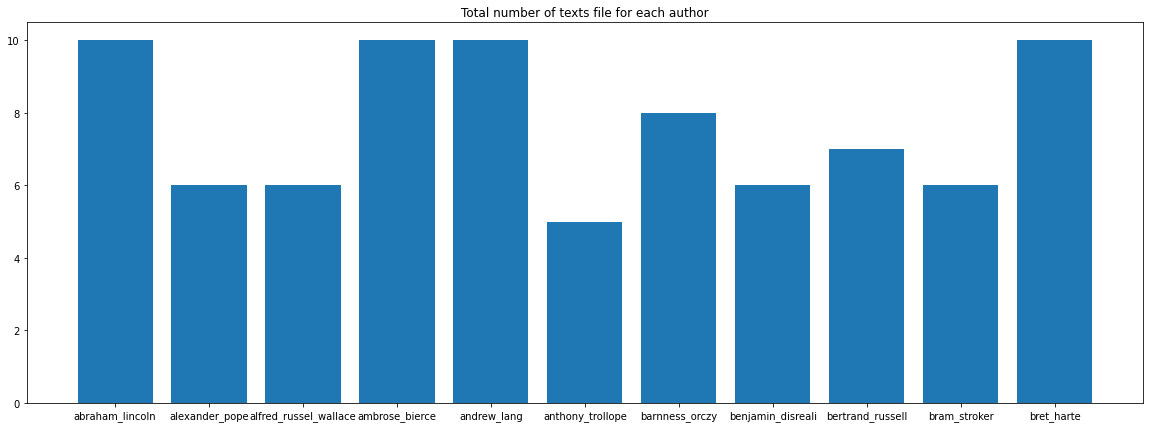

In [18]:
labels = ["abraham_lincoln", "alexander_pope", "alfred_russel_wallace", "ambrose_bierce", "andrew_lang", 
         "anthony_trollope", "barnness_orczy", "benjamin_disreali", "bertrand_russell",
         "bram_stroker", "bret_harte"]

plt.figure(figsize=(20, 7))
plt.bar(labels, num_of_labels)
plt.title('Total number of texts file for each author')

In [19]:
# Let see how many words data for each author
number_of_words = [0 for i in range(0,11,1)]
for i in range(len(y)):
    for j in range(len(number_of_words)):
        if y[i] == j:
            number_of_words[j] = number_of_words[j]+len(documents[i])
print(number_of_words)

[3396611, 2643760, 3884040, 2553458, 3230061, 3288589, 3810210, 3337201, 2440394, 2930544, 2386525]


Text(0.5, 1.0, 'Total number of words for each author')

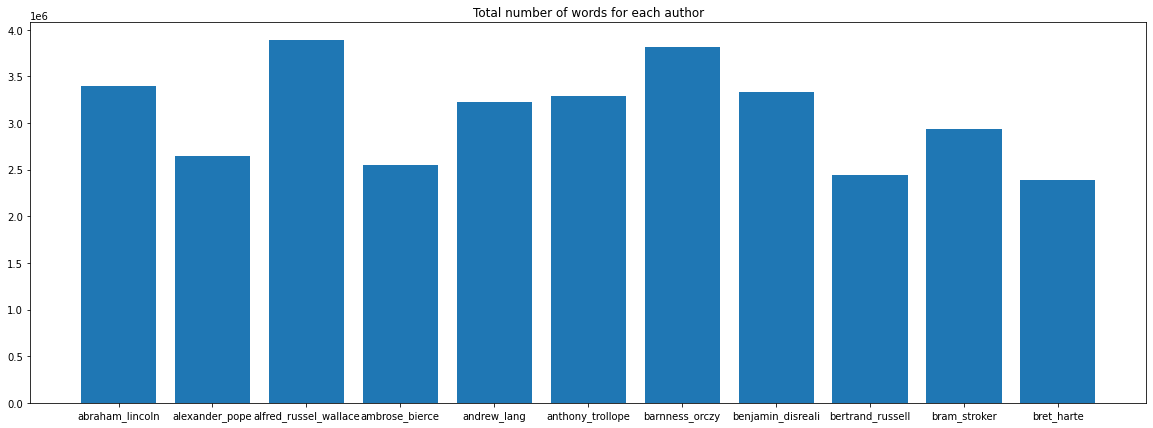

In [20]:
labels = ["abraham_lincoln", "alexander_pope", "alfred_russel_wallace", "ambrose_bierce", "andrew_lang", 
         "anthony_trollope", "barnness_orczy",  "benjamin_disreali", "bertrand_russell",
         "bram_stroker", "bret_harte"]

plt.figure(figsize=(20, 7))
plt.bar(labels, number_of_words)
plt.title('Total number of words for each author')

# 3. Using Bag of Word, apply supervised models such as Naive Bayes, Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting, including GridSearchCV.

In [21]:
# I am using the Bag of Word method to convert text documents into corresponding numerical features.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [45]:
print(X)

[[ 0  0  0 ...  4  0  0]
 [ 4  5  2 ...  4  0  4]
 [ 1  1  0 ... 10  0  0]
 ...
 [ 4  3  1 ...  0  0  0]
 [ 0  0  0 ...  4  1  0]
 [ 5  2  0 ...  9  0  2]]


In [46]:
print(X.shape)

(84, 1500)


In [47]:
count = 0
for i in range(len(X)):
    count = count + len(X[i])
print("Total words in data: ", count)

Total words in data:  126000


In [48]:
# Divides data into 20% test set and 80% training set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training data: ", len(X_train), "for features", len(y_train), "for targets")
print("Training data: ", len(X_test), "for features", len(y_test), "for targets")

Training data:  67 for features 67 for targets
Training data:  17 for features 17 for targets


## Naive Bayes

In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred))
print("Classification report: ", "\n", classification_report(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 1 1 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.25      1.00      0.40         1
           4       0.60      1.00      0.75         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         3
          10       1.00      0.33      0.50         3

    accuracy                           0.53        17
   macro avg       0.59      0.59      0.54        17
weighted avg       0.59      0.53      0.50        17

Accuracy score:  0.5294117647058824


## Logistic Regression

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg_dafault = LogisticRegression(solver='saga')
# fit the model with data
logreg_dafault.fit(X_train,y_train)
#Predict the Y values from X_test data
y_pred_LR = logreg_dafault.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_LR))
print("Classification report: ", "\n", classification_report(y_test,y_pred_LR))
print("Accuracy score: ", accuracy_score(y_test, y_pred_LR))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.17      1.00      0.29         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         3
          10       0.75      1.00      0.86         3

    accuracy                           0.65        17
   macro avg       0.55      0.67      0.57        17
weighted avg       0.55      0.65      0.58        17

Accuracy score:  0.6470588235294118


## Random Forest 

In [110]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_rf))
print("Classification report: ", "\n", classification_report(y_test,y_pred_rf))
print("Accuracy score: ", accuracy_score(y_test, y_pred_rf))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3

    accuracy                           0.88        17
   macro avg       0.92      0.91      0.89        17
weighted avg       0.93      0.88      0.88        17

Accuracy score:  0.8823529411764706


## Decision Tree

In [30]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_DT = clf.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DT))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DT))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DT))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.33      0.50      0.40         2
           9       0.40      0.67      0.50         3
          10       1.00      1.00      1.00         3

    accuracy                           0.65        17
   macro avg       0.58      0.59      0.56        17
weighted avg       0.67      0.65      0.63        17

Accuracy score:  0.6470588235294118


## Decision Tree with Entropy

In [31]:
# Create Decision Tree classifer object with Entropy
clfe = DecisionTreeClassifier(criterion='entropy')
clfe = clfe.fit(X_train,y_train)
y_pred_DTe = clfe.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DTe))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DTe))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DTe))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 2 0 0 0 1 0]
 [0 0 2 0 1 0 0 0 0]]
Classification report:  
               precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         3

    accuracy                           0.24        17
   macro avg       0.27      0.30      0.23        17
weighted avg       0.29      0.24      0.21        17

Accuracy score:  0.23529411764705882


## Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_GB))
print("Classification report: ", "\n", classification_report(y_test,y_pred_GB))
print("Accuracy score: ", accuracy_score(y_test, y_pred_GB))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 0 0 2 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       0.50      0.33      0.40         3
          10       1.00      1.00      1.00         3

    accuracy                           0.65        17
   macro avg       0.70      0.60      0.62        17
weighted avg      

## SVM(Support Vector Machines)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train, y_train)
y_test_SVM = clf_SVM.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_SVM))
print("Classification report: ", "\n", classification_report(y_test,y_test_SVM))
print("Accuracy score: ", accuracy_score(y_test, y_test_SVM))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.20      1.00      0.33         2
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       1.00      0.67      0.80         3

    accuracy                           0.35        17
   macro avg       0.30      0.41      0.31        17
weighted avg       0.29      0.35      0.28        17

Accuracy score:  0.35294117647058826


## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_test_knn = neigh.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_knn))
print("Classification report: ", "\n", classification_report(y_test,y_test_knn))
print("Accuracy score: ", accuracy_score(y_test, y_test_knn))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.08      1.00      0.15         1
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.50      0.33      0.40         3

    accuracy                           0.29        17
   macro avg       0.40      0.41      0.34        17
weighted avg       0.39      0.29      0.29        17

Accuracy score:  0.29411764705882354


## Summary - 1

In [201]:
# 1. Accuracy score with Naive Bayes:  0.5294117647058824
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.8823529411764706
# 4. Accuracy score with Decision Tree:  0.6470588235294118 without Entropy AND 0.23529411764705882 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.6470588235294118
# 6. Accuracy score with SVM(Support Vector Machines): 0.35294117647058826
# 7. Accuracy score with KNN: 0.29411764705882354

# Applying GridSearchCV

## Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[1, 10, 100], 
          'fit_intercept':[True, False],'solver':['lbfgs','saga'],
          'max_iter':[100,120,150,200]}

gridlog = GridSearchCV(LogisticRegression(), params,scoring= 'f1_micro', cv=5, n_jobs=2)
gridlog.fit(X_train, y_train)
print("The best parameter for Logistic Regression model: ",gridlog.best_params_)

The best parameter for Logistic Regression model:  {'C': 1, 'dual': False, 'fit_intercept': True, 'max_iter': 120, 'penalty': 'l2', 'solver': 'saga'}


In [58]:
#using the parameters from gridseaarchCV for Logistic Regression
logreg = LogisticRegression(C=1, dual= False, fit_intercept = True, max_iter=120, penalty= 'l2', solver='saga')
# fit the model with data
logreg.fit(X_train,y_train)
#Predict the Y values from X_test data
y_pred_LR_GridSearchCV = logreg.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_LR_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_LR_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_LR_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.14      1.00      0.25         1
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         3
          10       0.75      1.00      0.86         3

    accuracy                           0.59        17
   macro avg       0.54      0.63      0.55        17
weighted avg       0.55      0.59      0.54        17

Accuracy score:  0.5882352941176471


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':[200,250],'criterion':['gini','entropy'], 'max_depth':[None,8,10,12],
         'min_samples_split':[1,2,3,4],'max_leaf_nodes':[None,10,12,14,16,18],
          'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params)
grid_rf.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_rf.best_params_)

The best parameter for Decision Tree model:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'min_samples_split': 2, 'n_estimators': 250}


In [60]:
#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(criterion='gini', max_depth= 10, max_features='sqrt', 
                                max_leaf_nodes= 12, min_samples_split= 2, n_estimators= 250)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train,y_train)

# Using model to predict
y_pred_RF_GridSearchCV = clf_RF.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_RF_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_RF_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_RF_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3

    accuracy                           0.88        17
   macro avg       0.96      0.91      0.91        17
weighted avg       0.93      0.88      0.88        17

Accuracy score:  0.8823529411764706


## Gradient Boosting

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Call the model
clf_GB = GradientBoostingClassifier()
params = {'learning_rate':[0.06,0.08],'n_estimators':[200,250], 'max_depth':[8,9,10,12],
         'min_samples_split':[2,4],'max_leaf_nodes':[1,2],'max_features':['auto', 'sqrt', 'log2']}

grid_gb = GridSearchCV(clf_GB, params)
grid_gb.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_gb.best_params_)

The best parameter for Decision Tree model:  {'learning_rate': 0.06, 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_split': 4, 'n_estimators': 200}


In [40]:
# Call the model
clf_GB = GradientBoostingClassifier(learning_rate= 0.06, max_depth= 8, max_features= 'sqrt',
                                    max_leaf_nodes= 2, min_samples_split= 4, n_estimators= 200)
#Fit the model
clf_GB.fit(X_train, y_train)
#Use the model to predict
y_pred_GB_GridSearchCV = clf_GB.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_GB_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_GB_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_GB_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3

    accuracy                           0.88        17
   macro avg       0.92      0.91      0.89        17
weighted avg       0.93      0.88      0.88        17

Accuracy score:  0.8823529411764706


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'], 'splitter':['best', 'random'],'max_depth':[None,4,5,6,7,8,9,10],
          'min_samples_split':[2,4],'max_leaf_nodes':[None,8,10,12,14,16], 'max_features':['auto', 'sqrt', 'log2']}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, params)
grid_dt.fit(X_train, y_train)
print("The best parameter for Decision Tree model: ",grid_dt.best_params_)

The best parameter for Decision Tree model:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_split': 2, 'splitter': 'random'}


In [50]:
#using the parameters from gridseaarchCV for Decision Tree model
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_leaf_nodes= None, min_samples_split= 2, 
                             splitter= 'best',max_features= 'auto')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT_GridSearchCV = clf.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_pred_DT_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_pred_DT_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_pred_DT_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1]
 [0 0 0 2 0 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.33      1.00      0.50         1
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       1.00      0.67      0.80         3
          10       0.50      0.33      0.40         3

    accuracy                           0.41        17
   macro avg       0.43      0.43      0.41        17
weighted avg      

## SVM

In [43]:
from sklearn import svm
svc = svm.SVC(gamma='auto')
parameters = {'kernel':('linear','rbf'), 
              'C':[1, 20],'max_iter':[100,200]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print("The best parameter for SVM model: ",clf.best_params_)

The best parameter for SVM model:  {'C': 1, 'kernel': 'linear', 'max_iter': 100}


In [44]:
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',C= 1, kernel= 'linear', max_iter= 100,
                                              probability=True))
clf_SVM.fit(X_train, y_train)
y_test_SVM_GridSearchCV = clf_SVM.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_SVM_GridSearchCV))
print("Classification report: ", "\n", classification_report(y_test,y_test_SVM_GridSearchCV))
print("Accuracy score: ", accuracy_score(y_test, y_test_SVM_GridSearchCV))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       0.33      1.00      0.50         1
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3

    accuracy                           0.71        17
   macro avg       0.64      0.70      0.63        17
weighted avg       0.70      0.71      0.66        17

Accuracy score:  0.7058823529411765


## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,12))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 6, scoring = 'accuracy')
grid.fit(X_train, y_train)
print("The best parameter for SVM model: ",grid.best_params_)

The best parameter for SVM model:  {'n_neighbors': 1, 'weights': 'uniform'}


In [48]:
neigh = KNeighborsClassifier(n_neighbors=1,weights='uniform')
neigh.fit(X_train, y_train)
y_test_knn = neigh.predict(X_test)
print("Confusion matrix: ", "\n", confusion_matrix(y_test,y_test_knn))
print("Classification report: ", "\n", classification_report(y_test,y_test_knn))
print("Accuracy score: ", accuracy_score(y_test, y_test_knn))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.08      1.00      0.15         1
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.50      0.33      0.40         3

    accuracy                           0.29        17
   macro avg       0.40      0.41      0.34        17
weighted avg       0.39      0.29      0.29        17

Accuracy score:  0.29411764705882354


## Summary - 2

In [ ]:
######### BEFORE USING GRIDSEARCHCV
# 1. Accuracy score with Naive Bayes:  0.5294117647058824
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.8823529411764706
# 4. Accuracy score with Decision Tree:  0.6470588235294118 without Entropy AND 0.23529411764705882 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.6470588235294118
# 6. Accuracy score with SVM(Support Vector Machines): 0.35294117647058826
# 7. Accuracy score with KNN: 0.29411764705882354


######### AFTER USING GRIDSEARCHCV
# 1. Accuracy score with Naive Bayes: 0.5294117647058824
# 2. Accuracy score with Logistic Regression:  0.5882352941176471 - 0.6470588235294118
# 3. Accuracy score with Random Forest:  0.8823529411764706 - 0.8823529411764706
# 4. Accuracy score with Decision Tree:  0.23529411764705882(with Entropy) - 0.4117647058823529(with Entropy)
# 5. Accuracy score with Gradient Boosting: 0.8823529411764706 - 0.6470588235294118
# 6. Accuracy score with SVM(Support Vector Machines): 0.7058823529411765 - 0.35294117647058826
# 7. Accuracy score with KNN: 0.29411764705882354 - 0.29411764705882354

# 4. Similar to 3., but using TF-IDF.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_TFIDF = tfidfconverter.fit_transform(documents).toarray()

In [33]:
print(X_TFIDF[0])

[0.         0.         0.         ... 0.01536342 0.         0.        ]


In [34]:
from sklearn.model_selection import train_test_split
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, y, test_size=0.2, 
                                                                            random_state=0)
print("Training data: ", len(X_train_TFIDF), "for features", len(y_train_TFIDF), "for targets")
print("Training data: ", len(X_test_TFIDF), "for features", len(y_test_TFIDF), "for targets")

Training data:  67 for features 67 for targets
Training data:  17 for features 17 for targets


## Naive Bayes

In [35]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb_TFIDF = GaussianNB()
#Train the model using the training sets
gnb_TFIDF.fit(X_train_TFIDF, y_train_TFIDF)
#Predict the response for test dataset
y_pred_NB_TFIDF = gnb_TFIDF.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_NB_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_NB_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_NB_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 1 1 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         1
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         3
          10       1.00      0.67      0.80         3

    accuracy                           0.65        17
   macro avg       0.62      0.69      0.63        17
weighted avg       0.62      0.65      0.62        17

Accuracy score:  0.6470588235294118


## Logistic Regression

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg_TFIDF = LogisticRegression(solver='saga')
# fit the model with data
logreg_TFIDF.fit(X_train_TFIDF, y_train_TFIDF)
#Predict the Y values from X_test data
y_pred_LR_TFIDF = logreg_TFIDF.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_LR_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_LR_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_LR_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.17      1.00      0.29         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.75      1.00      0.86         3

    accuracy                           0.65        17
   macro avg       0.55      0.67      0.57        17
weighted avg       0.55      0.65      0.58        17

Accuracy score:  0.6470588235294118


## Random Forest

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_rf_TFIDF = classifier.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_rf_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_rf_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_rf_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3

    accuracy                           0.94        17
   macro avg       0.97      0.94      0.95        17
weighted avg       0.96      0.94      0.94        17

Accuracy score:  0.9411764705882353


## Decision Tree

In [38]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_DT_TFIDF = clf.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_DT_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_DT_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_DT_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 2 0]
 [0 0 0 1 0 1 0 0 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.50      0.50      0.50         2
           3       0.50      1.00      0.67         1
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.50      0.67      0.57         3
          10       1.00      0.33      0.50         3

    accuracy               

## Decision Tree with Entropy 

In [39]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_DT_TFIDF = clf.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_DT_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_DT_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_DT_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 2 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3

    accuracy                           0.47        17
   macro avg       0.36      0.44      0.34        17
weighted avg       0.48      0.47      0.42        17

Accuracy score:  0.47058823529411764


## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train_TFIDF, y_train_TFIDF)
y_pred_GB_TFIDF = clf_GB.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_pred_GB_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_pred_GB_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_pred_GB_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2
           3       0.25      1.00      0.40         1
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         3

    accuracy                           0.53        17
   macro avg       0.42      0.52      0.43        17
weighted avg      

## SVM(Support Vector Machines)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train_TFIDF, y_train_TFIDF)
y_test_SVM_TFIDF = clf_SVM.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_test_SVM_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_test_SVM_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_test_SVM_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.06      1.00      0.12         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3

    accuracy                           0.12        17
   macro avg       0.12      0.22      0.12        17
weighted avg       0.06      0.12      0.07        17

Accuracy score:  0.11764705882352941


## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_TFIDF, y_train_TFIDF)
y_test_knn_TFIDF = neigh.predict(X_test_TFIDF)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_TFIDF,y_test_knn_TFIDF))
print("Classification report: ", "\n", classification_report(y_test_TFIDF,y_test_knn_TFIDF))
print("Accuracy score: ", accuracy_score(y_test_TFIDF, y_test_knn_TFIDF))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [1 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3

    accuracy                           0.82        17
   macro avg       0.75      0.81      0.74        17
weighted avg       0.84      0.82      0.79        17

Accuracy score:  0.8235294117647058


## Summary - 3

In [27]:
######### USING BAG OF WORDS WITHOUT TF-IDF
# 1. Accuracy score with Naive Bayes:  0.5294117647058824
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.8823529411764706
# 4. Accuracy score with Decision Tree:  0.6470588235294118 without Entropy AND 0.23529411764705882 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.6470588235294118
# 6. Accuracy score with SVM(Support Vector Machines): 0.35294117647058826
# 7. Accuracy score with KNN: 0.29411764705882354


######### USING BAG OF WORDS WITH TF-IDF
# 1. Accuracy score with Naive Bayes:  0.6470588235294118
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.9411764705882353
# 4. Accuracy score with Decision Tree:  0.47058823529411764 and 0.47058823529411764
# 5. Accuracy score with Gradient Boosting: 0.5294117647058824
# 6. Accuracy score with SVM(Support Vector Machines): 0.11764705882352941
# 7. Accuracy score with KNN: 0.8235294117647058

# 5. Similar to 3., but using word2vec.

In [24]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# load the google word2vec model
filename = '/home/dungpm/Downloads/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True, limit = 200000)

In [25]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192315101624)]


In [26]:
#importing libraries
import spacy
#instantiating English module
nlp = spacy.load('en')
nlp.max_length = 3000000
word2vec_data = []
for i in range(len(documents)):
    #creating doc object containing our token features
    doc = nlp(documents[i])

    #Creating and updating our list of tokens using list comprehension 
    tokens = [token.text for token in doc]
    word2vec_data.append(tokens)
print("Length of word2vec_data: ", len(word2vec_data))

Length of word2vec_data:  84


In [27]:
print("Take a look at one of the word2vec_data: ", word2vec_data[0])

Take a look at one of the word2vec_data:  ['nthe', 'collected', 'nworks', 'of', 'nambrose', 'bierce', 'nvolume', 'ii', 'ni', 'the', 'midst', 'of', 'life', 'ntales', 'of', 'soldier', 'and', 'civilian', 'noriginally', 'published', '1909', 'npreface', 'nto', 'the', 'first', 'editio', 'ndenied', 'existence', 'by', 'the', 'chief', 'publishing', 'house', 'of', 'the', 'country', 'this', 'nbook', 'owes', 'itself', 'to', 'm', 'l', 'steele', 'merchant', 'of', 'this', 'city', 'i', 'nattesting', 'm', 'steele', 'faith', 'i', 'his', 'judgment', 'and', 'his', 'friend', 'it', 'will', 'nserve', 'it', 'autho', 'mai', 'and', 'best', 'ambitio', 'na', 'nsa', 'francisco', 'sept', '4', '1891', 'ncontents', 'na', 'horsema', 'i', 'the', 'sky', '15', 'na', 'occurrence', 'at', 'owl', 'creek', 'bridge', '27', 'nchickamauga', '46', 'na', 'so', 'of', 'the', 'god', '58', 'none', 'of', 'the', 'missing', '71', 'nkilled', 'at', 'resaca', '93', 'nthe', 'affai', 'at', 'coulte', 'notch', '105', 'nthe', 'coup', 'de', 'g', 

In [28]:
import numpy as np
word2vec_data_vec = []
for j in range(len(word2vec_data)):
    vec = []
    for i in range(len(word2vec_data[j])):
        if word2vec_data[j][i] in model.vocab:
            a = np.array(model.get_vector(word2vec_data[j][i]))
            vec.append(a)
    vec = np.array(vec)
    vec_average = np.average(vec, axis=0)
    word2vec_data_vec.append(vec_average)
final_data = np.array(word2vec_data_vec)
print(final_data.shape)

(84, 300)


In [29]:
from sklearn.model_selection import train_test_split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(final_data, y, test_size=0.2, random_state=0)

print("Training data: ", len(X_train_w2v), "for features", len(y_train_w2v), "for targets")
print("Training data: ", len(X_test_w2v), "for features", len(y_test_w2v), "for targets")

Training data:  67 for features 67 for targets
Training data:  17 for features 17 for targets


## Logistic Regression 

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# instantiate the model (using the default parameters)
logreg_dafault = LogisticRegression(solver='saga')
# fit the model with data
logreg_dafault.fit(X_train_w2v,y_train_w2v)
#Predict the Y values from X_test data
y_pred_LR_w2v = logreg_dafault.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_LR_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_LR_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_LR_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [2 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]]
Classification report:  
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2
           3       0.07      1.00      0.13         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3

    accuracy                           0.12        17
   macro avg       0.04      0.22      0.07        17
weighted avg       0.02      0.12      0.04        17

Accuracy score:  0.11764705882352941


## Naive Bayes

In [22]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train_w2v, y_train_w2v)
#Predict the response for test dataset
y_pred_w2v = gnb.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.25      1.00      0.40         1
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         3

    accuracy                           0.65        17
   macro avg       0.64      0.72      0.64        17
weighted avg       0.57      0.65      0.57        17

Accuracy score:  0.6470588235294118


## Random Forest 

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_w2v, y_train_w2v)
y_pred_rf_w2v = classifier.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_rf_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_rf_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_rf_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.25      1.00      0.40         1
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3

    accuracy                           0.71        17
   macro avg       0.60      0.74      0.64        17
weighted avg       0.63      0.71      0.65        17

Accuracy score:  0.7058823529411765


## Decision Tree 

In [24]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_w2v,y_train_w2v)
y_pred_DT_w2v = clf.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_DT_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_DT_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_DT_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 2 1 0]
 [0 0 0 1 0 0 0 0 0 2]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           9       1.00      0.33      0.50         3
          10       0.67      0.67      0.67         3

    accuracy                           0.41        17
   macro avg       0.44      0.50      0.42        17
weighted avg      

## Decision Tree  with Entropy 

In [25]:
# Create Decision Tree classifer object with Entropy
clfe = DecisionTreeClassifier(criterion='entropy')
clfe = clfe.fit(X_train_w2v,y_train_w2v)
y_pred_DTe_w2v= clfe.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_DTe_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_DTe_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_DTe_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 2 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 2 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 1]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.33      1.00      0.50         1
           7       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         3
          10       0.50      0.33      0.40         3

    accuracy                           0.29        17
   macro avg       0.31      0.38      0.30        17
weighted avg      

##  Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train_w2v, y_train_w2v)
y_pred_GB_w2v = clf_GB.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_GB_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_GB_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_GB_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [2 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         2
           9       0.50      0.33      0.40         3
          10       1.00      1.00      1.00         3

    accuracy                           0.53        17
   macro avg       0.58      0.57      0.53        17
weighted avg       0.63      0.53      0.54        17

Accuracy score:  0.5294117647058824


## SVM

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train_w2v, y_train_w2v)
y_test_SVM_w2v= clf_SVM.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_test_SVM_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_test_SVM_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_test_SVM_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 2 0 0 1]
 [0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.33      1.00      0.50         1
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         1
           6       0.25      1.00      0.40         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.75      1.00      0.86         3

    accuracy                           0.59        17
   macro avg       0.56      0.69      0.57        17
weighted avg       0.52      0.59      0.52        17

Accuracy score:  0.5882352941176471


## KNN 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_w2v, y_train_w2v)
y_test_knn_w2v = neigh.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_test_knn_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_test_knn_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_test_knn_w2v))

Confusion matrix:  
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 3]]
Classification report:  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.25      1.00      0.40         1
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3
          10       0.75      1.00      0.86         3

    accuracy                           0.65        17
   macro avg       0.65      0.65      0.59        17
weighted avg      

In [ ]:
# USING BAG OF WORDS
# 1. Accuracy score with Naive Bayes:  0.5294117647058824
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.8823529411764706
# 4. Accuracy score with Decision Tree:  0.6470588235294118 and 0.23529411764705882(Entropy)
# 5. Accuracy score with Gradient Boosting: 0.6470588235294118
# 6. Accuracy score with SVM(Support Vector Machines): 0.35294117647058826
# 7. Accuracy score with KNN: 0.29411764705882354

In [ ]:
######### USING BAG OF WORDS WITH TF-IDF
# 1. Accuracy score with Naive Bayes:  0.6470588235294118
# 2. Accuracy score with Logistic Regression:  0.6470588235294118
# 3. Accuracy score with Random Forest:  0.9411764705882353
# 4. Accuracy score with Decision Tree:  0.47058823529411764 and 0.47058823529411764(Entropy)
# 5. Accuracy score with Gradient Boosting: 0.5294117647058824
# 6. Accuracy score with SVM(Support Vector Machines): 0.11764705882352941
# 7. Accuracy score with KNN: 0.8235294117647058

In [ ]:
######### USING WORD2VEC
# 1. Accuracy score with Naive Bayes: 0.6470588235294118
# 2. Accuracy score with Logistic Regression: 0.11764705882352941 
# 3. Accuracy score with Random Forest: 0.7058823529411765 
# 4. Accuracy score with Decision Tree: 0.4117647058823529 and 0.29411764705882354(Entropy)
# 5. Accuracy score with Gradient Boosting: 0.5294117647058824
# 6. Accuracy score with SVM(Support Vector Machines): 0.5882352941176471
# 7. Accuracy score with KNN: 0.6470588235294118

# 6. Appy RNN to do classification.

In [ ]:
import re
import nltk
nltk.download('stopwords')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from nltk.corpus import stopwords
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences

In [ ]:
movie_data = load_files(r"/home/dungpm/dungpm/NLP_author_classification/data_final")
X, y = movie_data.data, movie_data.target

documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove "\n"
    document = re.sub(r'\n\s+', ' ', document)
    # remove "\n"
    document = re.sub(r'\r\s+', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # remove all single "n" characters
    document = re.sub(r'n\s+', ' ', document)
    # remove all single "r" characters
    document = re.sub(r'r\s+', ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [ ]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# load the google word2vec model
filename = '/home/dungpm/Downloads/GoogleNews-vectors-negative300.bin'
model_w2v = KeyedVectors.load_word2vec_format(filename, binary=True, limit = 100000)

In [ ]:
#importing libraries
import spacy
#instantiating English module
nlp = spacy.load('en')
nlp.max_length = 3000000
word2vec_data = []
for i in range(len(documents)):
    #creating doc object containing our token features
    doc = nlp(documents[i])

    #Creating and updating our list of tokens using list comprehension 
    tokens = [token.text for token in doc]
    word2vec_data.append(tokens)
print("Length of word2vec_data: ", len(word2vec_data))

In [ ]:
import numpy as np
word2vec_data_vec = []
for j in range(len(word2vec_data)):
    vec = []
    for i in range(len(word2vec_data[j])):
        if word2vec_data[j][i] in model.vocab:
            a = np.array(model_w2v.get_vector(word2vec_data[j][i]))
            vec.append(a)
    vec = np.array(vec)
    vec_average = np.average(vec, axis=0)
    word2vec_data_vec.append(vec_average)
final_data = np.array(word2vec_data_vec)
print(final_data.shape)

In [66]:
from keras.utils import to_categorical
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

X_RNN = final_data
Y_RNN = to_categorical(y, 11)

print('Shape of data tensor:', X_RNN.shape)
print('Shape of test tensor:', Y_RNN.shape)

X_train_RNN, X_test_RNN, Y_train_RNN, Y_test_RNN = train_test_split(X_RNN, Y_RNN, test_size=0.2, random_state=0)

print(X_train_RNN.shape,Y_train_RNN.shape)
print(X_test_RNN.shape,Y_test_RNN.shape)

Shape of data tensor: (84, 300)
Shape of test tensor: (84, 11)
(67, 300) (67, 11)
(17, 300) (17, 11)


In [67]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model_RNN = Sequential()
model_RNN.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_RNN.shape[1]))
model_RNN.add(SpatialDropout1D(0.2))
model_RNN.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_RNN.add(Dense(11, activation='softmax'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_RNN.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          200000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 300, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 11)                1111      
Total params: 281,511
Trainable params: 281,511
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 20
batch_size = 64

history = model_RNN.fit(X_train_RNN, Y_train_RNN, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', 
                                                                  patience=3, min_delta=0.0001)])

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 2.3986 - accuracy: 0.0833 - val_loss: 2.3929 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 1s 786ms/step - loss: 2.3890 - accuracy: 0.1500 - val_loss: 2.3859 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 1s 795ms/step - loss: 2.3867 - accuracy: 0.1167 - val_loss: 2.3794 - val_accuracy: 0.1429
Epoch 4/20
1/1 [==============================] - 1s 795ms/step - loss: 2.3857 - accuracy: 0.1000 - val_loss: 2.3731 - val_accuracy: 0.1429
Epoch 5/20
1/1 [==============================] - 1s 788ms/step - loss: 2.3751 - accuracy: 0.1333 - val_loss: 2.3676 - val_accuracy: 0.1429
Epoch 6/20
1/1 [==============================] - 1s 953ms/step - loss: 2.3756 - accuracy: 0.1333 - val_loss: 2.3617 - val_accuracy: 0.1429
Epoch 7/20
1/1 [==============================] - 1s 784ms/step - loss: 2.3697 - accuracy: 0.1167 - val_loss: 2.3551 - val_accuracy: 0.1429
Epoch 8/20
1/1 

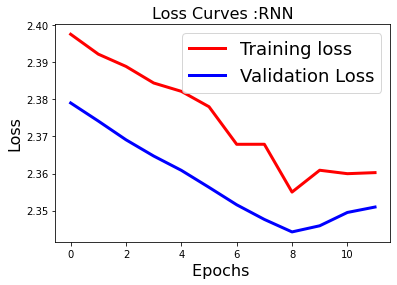

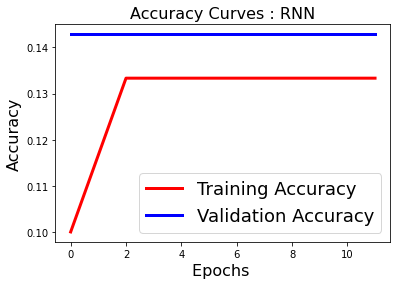

In [62]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')

plt.show()

fig2=plt.figure()
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

# 8. Using LSA, LDA and NNMF, print out top ten words (with their highest loading) for each topic modeling. Analyze and compare among three methods.

## Using LSA

In [101]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [102]:
data_LSA = load_files(r"/home/dungpm/dungpm/NLP_author_classification/data_final")
X_LSA, y_LSA = data_LSA.data, data_LSA.target
path_LSA = data_LSA.filenames

In [103]:
def load_data_new(input_path):

    documents_list = []
    titles=[]
    for i in range(len(input_path)):
        path = input_path[i]
        with open(path ,"r") as fin:
            for line in fin.readlines():
                text = line.strip()
                documents_list.append(text)
        # print("Total Number of Documents:",len(documents_list))
        titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

document_list,titles=load_data_new(path_LSA)
print("document_list: ", len(document_list))
print("titles: ", len(titles))

document_list:  723281
titles:  84


In [104]:
def preprocess_data(doc_set):

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
clean_text=preprocess_data(document_list)
print("clean_text: ",len(clean_text))

clean_text:  723281


In [105]:
def prepare_corpus(doc_clean):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [106]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):

    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [107]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [108]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

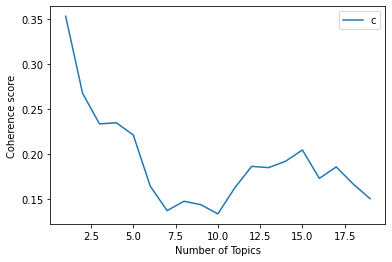

In [115]:
start,stop,step=1,20,1
plot_graph(clean_text,start,stop,step)

In [116]:
# LSA Model
number_of_topics=15
words=10
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.620*"one" + 0.566*"would" + 0.237*"said" + 0.128*"mr" + 0.121*"man" + 0.115*"could" + 0.077*"like" + 0.076*"time" + 0.074*"know" + 0.074*"say"'), (1, '-0.703*"would" + 0.701*"one" + -0.058*"said" + 0.039*"two" + -0.034*"mr" + -0.026*"think" + -0.024*"come" + 0.024*"anoth" + -0.022*"could" + -0.019*"go"'), (2, '0.778*"said" + -0.362*"would" + 0.275*"mr" + -0.263*"one" + 0.112*"man" + 0.081*"know" + 0.077*"may" + 0.072*"could" + 0.062*"well" + 0.060*"see"'), (3, '-0.529*"said" + 0.395*"man" + 0.357*"could" + 0.258*"mr" + -0.194*"would" + -0.188*"one" + 0.133*"may" + 0.128*"time" + 0.118*"see" + 0.110*"say"'), (4, '0.878*"mr" + -0.346*"man" + -0.170*"could" + -0.147*"said" + 0.085*"slope" + -0.071*"may" + 0.054*"one" + -0.052*"know" + -0.046*"see" + -0.041*"like"'), (5, '-0.694*"man" + 0.673*"could" + 0.138*"see" + -0.117*"mr" + -0.062*"young" + 0.051*"time" + -0.047*"old" + -0.038*"like" + -0.037*"would" + 0.037*"noth"'), (6, '-0.548*"could" + -0.415*"man" + 0.352*"may" + 0.276*"

In [114]:
# (0, '0.620*"one" + 0.566*"would" + 0.237*"said" + 0.128*"mr" + 0.121*"man" + 0.115*"could" + 0.077*"like" + 0.076*"time" + 0.074*"know" + 0.074*"say"'), 
# (1, '-0.703*"would" + 0.701*"one" + -0.058*"said" + 0.039*"two" + -0.034*"mr" + -0.026*"think" + -0.024*"come" + 0.024*"anoth" + -0.022*"could" + -0.019*"go"'), 
# (2, '0.778*"said" + -0.362*"would" + 0.275*"mr" + -0.263*"one" + 0.112*"man" + 0.081*"know" + 0.077*"may" + 0.072*"could" + 0.062*"well" + 0.060*"see"'), 
# (3, '-0.529*"said" + 0.395*"man" + 0.357*"could" + 0.258*"mr" + -0.194*"would" + -0.188*"one" + 0.133*"may" + 0.128*"time" + 0.118*"see" + 0.110*"say"'), 
# (4, '0.878*"mr" + -0.346*"man" + -0.170*"could" + -0.147*"said" + 0.085*"slope" + -0.071*"may" + 0.054*"one" + -0.052*"know" + -0.046*"see" + -0.041*"like"'), 
# (5, '-0.694*"man" + 0.673*"could" + 0.138*"see" + -0.117*"mr" + -0.062*"young" + 0.051*"time" + -0.047*"old" + -0.038*"like" + -0.037*"would" + 0.037*"noth"'), 
# (6, '-0.548*"could" + -0.415*"man" + 0.352*"may" + 0.276*"time" + -0.158*"mr" + 0.147*"come" + 0.126*"know" + 0.122*"upon" + 0.121*"day" + 0.119*"must"'), 
# (7, '-0.652*"may" + 0.567*"like" + 0.218*"look" + -0.193*"know" + 0.165*"upon" + 0.137*"time" + -0.118*"say" + 0.116*"seem" + 0.105*"great" + 0.097*"hand"'), 
# (8, '0.693*"time" + -0.467*"like" + -0.361*"know" + -0.192*"say" + 0.151*"great" + -0.132*"may" + -0.115*"look" + 0.102*"come" + 0.085*"man" + -0.082*"well"'), 
# (9, '0.622*"upon" + -0.404*"like" + -0.366*"time" + 0.334*"look" + -0.207*"know" + 0.170*"eye" + 0.161*"hand" + 0.117*"state" + 0.106*"face" + -0.066*"say"'), 
# (10, '0.713*"state" + 0.287*"say" + 0.229*"unit" + -0.221*"may" + 0.209*"speci" + -0.188*"come" + -0.171*"look" + -0.117*"time" + -0.113*"upon" + 0.087*"great"'), 
# (11, '-0.558*"come" + 0.507*"say" + 0.329*"sir" + -0.304*"state" + -0.158*"know" + -0.121*"shall" + -0.115*"see" + 0.109*"thoma" + 0.107*"perci" + 0.106*"time"'), 
# (12, '0.549*"lord" + 0.488*"ladi" + 0.229*"speci" + -0.192*"time" + 0.190*"montfort" + 0.173*"island" + 0.165*"day" + -0.153*"upon" + -0.144*"say" + 0.140*"monmouth"'), 
# (13, '0.827*"pope" + 0.429*"footnot" + 0.126*"letter" + 0.120*"p" + -0.116*"ayala" + -0.085*"ladi" + 0.063*"vol" + 0.061*"like" + -0.056*"say" + 0.053*"may"'), 
# (14, '-0.739*"ayala" + 0.329*"speci" + 0.311*"island" + 0.140*"may" + -0.132*"ladi" + 0.127*"bird" + -0.124*"pope" + -0.124*"day" + 0.111*"like" + 0.111*"peculiar"')]

## Using LDA

In [13]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [14]:
#importing libraries
import spacy
#instantiating English module
nlp = spacy.load('en')
nlp.max_length = 3000000
LDA_data = []
for i in range(len(documents)):
    #creating doc object containing our token features
    doc = nlp(documents[i])

    #Creating and updating our list of tokens using list comprehension 
    tokens = [token.text for token in doc]
    LDA_data.append(tokens)
print("Length of word2vec_data: ", len(LDA_data))

Length of word2vec_data:  84


In [29]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(LDA_data)
# Create Corpus
texts = LDA_data
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

/home/dungpm/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 2), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
import gensim
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/dungpm/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# import pyLDAvis.gensim
from pyLDAvis import gensim
import os
import pickle 
import pyLDAvis
# Visualize the topics
num_topics = 10
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/dungpm/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IsADirectoryError: [Errno 21] Is a directory: './results/ldavis_prepared_10'

# 9. Write up analysis and conclusions.

In [20]:
# This is re result when I used Bag of Word to my data and then apply supervised models such as Naive Bayes, 
# Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting. We can see that 
# Logistic Regression and Random Forest had the highest accuracy (at 0.818) and SVM(Support Vector Machines) had 
# the lowest accuracy.

######### USING BAG OF WORD WITHOUT GRIDSEARCHCV
# 1. Accuracy score with Naive Bayes:  0.5
# 2. Accuracy score with Logistic Regression:  0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365
# 7. Accuracy score with KNN: 0.6363636363636364

######### USING BAG OF WORD WITH GRIDSEARCHCV
# 1. Could not use GRIDSEARCHCV
# 2. Accuracy score with Logistic Regression:  0.8181818181818182 ==== 0.8181818181818182
# 3. Accuracy score with Random Forest:  0.8181818181818182 >>>> 0.7727272727272727
# 4. Accuracy score with Decision Tree:  0.45454545454545453 without Entropy AND 0.5909090909090909 with Entropy 
# <<<< 0.6363636363636364
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 <<<< 0.8636363636363636
# 6. Accuracy score with SVM(Support Vector Machines): 0.36363636363636365 <<<< 0.5909090909090909
# 7. Accuracy score with KNN: 0.6363636363636364 ==== 0.6363636363636364

# And after I used GRIDSEARCHCV we can see that almost they get higher accucary with GRIDSEARCHCV, unless 
# Random Forest has been reduced the accuracy. The reason could be I have not found it best parameters.


######### USING BAG OF WORDS WITH TF-IDF
# 1. Accuracy score with Naive Bayes:  0.5 (keep)
# 2. Accuracy score with Logistic Regression:  0.8636363636363636 (increased)
# 3. Accuracy score with Random Forest:  0.8636363636363636 (increased)
# 4. Accuracy score with Decision Tree:  0.6363636363636364 (increased) without Entropy 
# AND 0.6363636363636364 (increased) with Entropy
# 5. Accuracy score with Gradient Boosting: 0.7272727272727273 (increased)
# 6. Accuracy score with SVM(Support Vector Machines): 0.5 (decreased)
# 7. Accuracy score with KNN: 0.7727272727272727 (increased)

# I also applied TF-IDF and BAG OF WORDS in the same time, the results is quite good. Even without uing 
# GRIDSEARCHCV I also get high accuracy, event higher than the accuracy USING BAG OF WORD WITH GRIDSEARCHCV (at 
# Logistic Regression, Random Forest, Decision Tree, Decision Tree with Entropy, Gradient Boosting, KNN)
# We can make the conclusion that USING BAG OF WORDS WITH TF-IDF would be leading to better accuracy in this task.

# For applying RNN for text classification, until now I have been tried so many type of model(with different type
# of number of layers or numbers of weight) but I still could not get good result. In my opinion, the reason of 
# this dispoiting is I have not used the suitable methods for data preprocessing and have not found the best model
# and best parameter such as: The maximum number of words to be used. (most frequent) - MAX_NB_WORDS, 
# Max number of words in each complaint - MAX_SEQUENCE_LENGTH and EMBEDDING_DIM. Also depending on my experient
# on dealing with text data (preprocessing, text desiged model for training).